This notebook is mainly for generating graphs for exports of certain goods among countries
for the purpose of visualization of WTN.

In [66]:
%matplotlib inline
import igraph as ig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import re

In [2]:
WTN = pd.read_csv('/Users/YuchenZheng/Downloads/year_origin_destination_hs07_4.tsv',sep='\t')

In [3]:
WTN = WTN.fillna(0)

In [16]:
WTN.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [4]:
WTN2010 = WTN[WTN['year'] == 2010]
WTN2010.head()

,year,origin,dest,hs07,export_val,import_val
9134246,2010,ago,bfa,9703,0.0,15048.0
9134247,2010,ago,civ,806,0.0,59603.0
9134248,2010,ago,civ,902,0.0,434125.0
9134249,2010,ago,civ,1202,0.0,10010.0
9134250,2010,ago,civ,1704,0.0,10663.0


902 is the code in Harmonized System Codes (HS Code) Commodity Classification System that represents tea. Choose one country that is among the most tea exporters in certain years, manipulate with the dataframes and make some visualization

In [5]:
tea2010 = WTN[(WTN['hs07'] == 902) & (WTN['export_val']>0) & (WTN['year'] == 2010)]

161

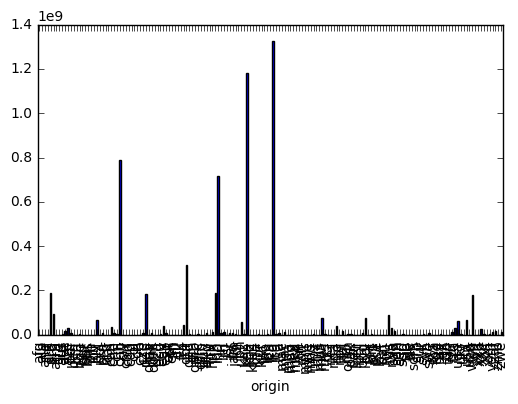

In [7]:
test=tea2010.groupby(by=['origin'])['export_val'].sum()
test.plot(kind = 'bar')
len(test)

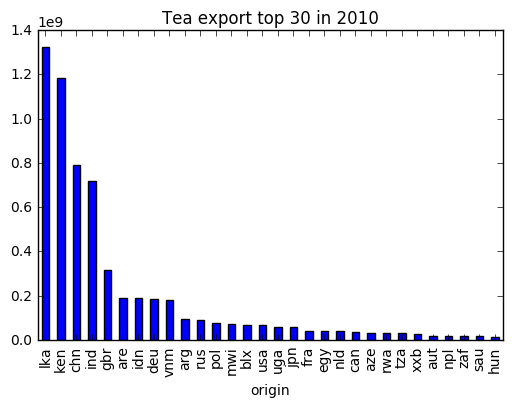

In [8]:
test.sort_values(ascending=False)
test1 = test.nlargest(30)
test1.plot(kind='bar', title = "Tea export top 30 in 2010")

In [9]:
sri_lanka2008 = WTN[(WTN['origin'] == "lka") & (WTN['export_val']>0) & (WTN['year'] == 2008)]
sri_lanka2009 = WTN[(WTN['origin'] == "lka") & (WTN['export_val']>0) & (WTN['year'] == 2009)]
sri_lanka2010 = WTN[(WTN['origin'] == "lka") & (WTN['export_val']>0) & (WTN['year'] == 2010)]
sri_lanka2011 = WTN[(WTN['origin'] == "lka") & (WTN['export_val']>0) & (WTN['year'] == 2011)]
sri_lanka2012 = WTN[(WTN['origin'] == "lka") & (WTN['export_val']>0) & (WTN['year'] == 2012)]

In [15]:
sri_lanka2012.head()

,year,origin,dest,hs07,export_val,import_val
20230199,2012,lka,ago,801,158924.0,0.0
20230200,2012,lka,ago,902,3737194.0,0.0
20230201,2012,lka,ago,1905,138041.0,0.0
20230202,2012,lka,ago,4011,177719.0,0.0
20230203,2012,lka,ago,4012,75340.0,0.0


In [11]:
sri_lanka_export2008 = sri_lanka2008.groupby(by=['origin'])['export_val'].sum()
sri_lanka_export2009 = sri_lanka2009.groupby(by=['origin'])['export_val'].sum()
sri_lanka_export2010 = sri_lanka2010.groupby(by=['origin'])['export_val'].sum()
sri_lanka_export2011 = sri_lanka2011.groupby(by=['origin'])['export_val'].sum()
sri_lanka_export2012 = sri_lanka2012.groupby(by=['origin'])['export_val'].sum()
tea2008 = WTN[(WTN['hs07'] == 902) & (WTN['export_val']>0) & (WTN['year'] == 2008) & (WTN['origin'] == 'lka')]
tea2009 = WTN[(WTN['hs07'] == 902) & (WTN['export_val']>0) & (WTN['year'] == 2009) & (WTN['origin'] == 'lka')]
tea2010 = WTN[(WTN['hs07'] == 902) & (WTN['export_val']>0) & (WTN['year'] == 2010) & (WTN['origin'] == 'lka')]
tea2011 = WTN[(WTN['hs07'] == 902) & (WTN['export_val']>0) & (WTN['year'] == 2011) & (WTN['origin'] == 'lka')]
tea2012 = WTN[(WTN['hs07'] == 902) & (WTN['export_val']>0) & (WTN['year'] == 2012) & (WTN['origin'] == 'lka')]

In [12]:
sri_lanka_tea_export_2008=tea2008.groupby(by=['origin'])['export_val'].sum()
sri_lanka_tea_export_2009=tea2009.groupby(by=['origin'])['export_val'].sum()
sri_lanka_tea_export_2010=tea2010.groupby(by=['origin'])['export_val'].sum()
sri_lanka_tea_export_2011=tea2011.groupby(by=['origin'])['export_val'].sum()
sri_lanka_tea_export_2012=tea2012.groupby(by=['origin'])['export_val'].sum()


In [13]:
type(sri_lanka_export2008)

pandas.core.series.Series

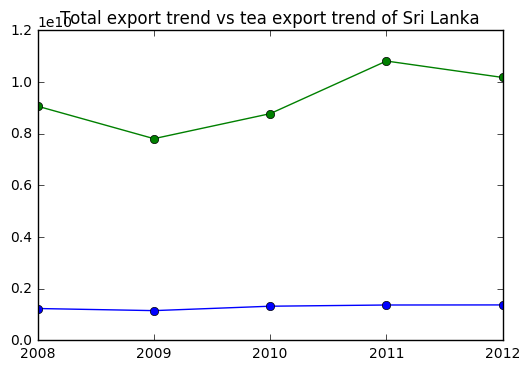

In [14]:
years = [2008,2009,2010,2011,2012]
x = np.array([0,1,2,3,4])
plt.xticks(x, years)
export = [sri_lanka_export2008,sri_lanka_export2009,sri_lanka_export2010,sri_lanka_export2011,sri_lanka_export2012]
tea = [sri_lanka_tea_export_2008,sri_lanka_tea_export_2009,sri_lanka_tea_export_2010,sri_lanka_tea_export_2011,sri_lanka_tea_export_2012]
plt.plot(x,export,marker='o',color = 'green',linestyle = 'solid')
plt.plot(x,tea,marker='o',color = 'blue',linestyle = 'solid')
plt.title('Total export trend vs tea export trend of Sri Lanka')
plt.show()

In [16]:
export

[origin
 lka    9.066647e+09
 Name: export_val, dtype: float64, origin
 lka    7.810513e+09
 Name: export_val, dtype: float64, origin
 lka    8.778992e+09
 Name: export_val, dtype: float64, origin
 lka    1.081625e+10
 Name: export_val, dtype: float64, origin
 lka    1.017980e+10
 Name: export_val, dtype: float64]

In [17]:
tea

[origin
 lka    1.235851e+09
 Name: export_val, dtype: float64, origin
 lka    1.154372e+09
 Name: export_val, dtype: float64, origin
 lka    1.324976e+09
 Name: export_val, dtype: float64, origin
 lka    1.371910e+09
 Name: export_val, dtype: float64, origin
 lka    1.375160e+09
 Name: export_val, dtype: float64]

Do the same thing with tobacoo

In [18]:
tobacoo1_2008 = WTN[(WTN['hs07'] == 2401) & (WTN['export_val']>0) & (WTN['year'] == 2008) & (WTN['origin'] == 'deu')]
tobacoo2_2008 = WTN[(WTN['hs07'] == 2402) & (WTN['export_val']>0) & (WTN['year'] == 2008) & (WTN['origin'] == 'deu')]
tobacoo3_2008 = WTN[(WTN['hs07'] == 2403) & (WTN['export_val']>0) & (WTN['year'] == 2008) & (WTN['origin'] == 'deu')]
tobacoo1_2009 = WTN[(WTN['hs07'] == 2401) & (WTN['export_val']>0) & (WTN['year'] == 2009) & (WTN['origin'] == 'deu')]
tobacoo2_2009 = WTN[(WTN['hs07'] == 2402) & (WTN['export_val']>0) & (WTN['year'] == 2009) & (WTN['origin'] == 'deu')]
tobacoo3_2009 = WTN[(WTN['hs07'] == 2403) & (WTN['export_val']>0) & (WTN['year'] == 2009) & (WTN['origin'] == 'deu')] 
tobacoo1_2010 = WTN[(WTN['hs07'] == 2401) & (WTN['export_val']>0) & (WTN['year'] == 2010) & (WTN['origin'] == 'deu')]
tobacoo2_2010 = WTN[(WTN['hs07'] == 2402) & (WTN['export_val']>0) & (WTN['year'] == 2010) & (WTN['origin'] == 'deu')]
tobacoo3_2010 = WTN[(WTN['hs07'] == 2403) & (WTN['export_val']>0) & (WTN['year'] == 2010) & (WTN['origin'] == 'deu')]
tobacoo1_2011 = WTN[(WTN['hs07'] == 2401) & (WTN['export_val']>0) & (WTN['year'] == 2011) & (WTN['origin'] == 'deu')]
tobacoo2_2011 = WTN[(WTN['hs07'] == 2402) & (WTN['export_val']>0) & (WTN['year'] == 2011) & (WTN['origin'] == 'deu')]
tobacoo3_2011 = WTN[(WTN['hs07'] == 2403) & (WTN['export_val']>0) & (WTN['year'] == 2011) & (WTN['origin'] == 'deu')]
tobacoo1_2012 = WTN[(WTN['hs07'] == 2401) & (WTN['export_val']>0) & (WTN['year'] == 2012) & (WTN['origin'] == 'deu')]
tobacoo2_2012 = WTN[(WTN['hs07'] == 2402) & (WTN['export_val']>0) & (WTN['year'] == 2012) & (WTN['origin'] == 'deu')]
tobacoo3_2012 = WTN[(WTN['hs07'] == 2403) & (WTN['export_val']>0) & (WTN['year'] == 2012) & (WTN['origin'] == 'deu')]
tobacoo1_2013 = WTN[(WTN['hs07'] == 2401) & (WTN['export_val']>0) & (WTN['year'] == 2013) & (WTN['origin'] == 'deu')]
tobacoo2_2013 = WTN[(WTN['hs07'] == 2402) & (WTN['export_val']>0) & (WTN['year'] == 2013) & (WTN['origin'] == 'deu')]
tobacoo3_2013 = WTN[(WTN['hs07'] == 2403) & (WTN['export_val']>0) & (WTN['year'] == 2013) & (WTN['origin'] == 'deu')]
tobacoo1_2014 = WTN[(WTN['hs07'] == 2401) & (WTN['export_val']>0) & (WTN['year'] == 2014) & (WTN['origin'] == 'deu')]
tobacoo2_2014 = WTN[(WTN['hs07'] == 2402) & (WTN['export_val']>0) & (WTN['year'] == 2014) & (WTN['origin'] == 'deu')]
tobacoo3_2014 = WTN[(WTN['hs07'] == 2403) & (WTN['export_val']>0) & (WTN['year'] == 2014) & (WTN['origin'] == 'deu')]



In [19]:
tobacoo2008_temp = [tobacoo1_2008, tobacoo2_2008, tobacoo3_2008]
tobacoo2008 = pd.concat(tobacoo2008_temp)
tobacoo2009_temp = [tobacoo1_2009, tobacoo2_2009, tobacoo3_2009]
tobacoo2009 = pd.concat(tobacoo2009_temp)
tobacoo2010_temp = [tobacoo1_2010, tobacoo2_2010, tobacoo3_2010]
tobacoo2010 = pd.concat(tobacoo2010_temp)
tobacoo2011_temp = [tobacoo1_2011, tobacoo2_2011, tobacoo3_2011]
tobacoo2011 = pd.concat(tobacoo2011_temp)
tobacoo2012_temp = [tobacoo1_2012, tobacoo2_2012, tobacoo3_2012]
tobacoo2012 = pd.concat(tobacoo2012_temp)
tobacoo2013_temp = [tobacoo1_2013, tobacoo2_2013, tobacoo3_2013]
tobacoo2013 = pd.concat(tobacoo2013_temp)
tobacoo2014_temp = [tobacoo1_2014, tobacoo2_2014, tobacoo3_2014]
tobacoo2014 = pd.concat(tobacoo2014_temp)


In [20]:
deu_toba_export_2008=tobacoo2008.groupby(by=['origin'])['export_val'].sum()
deu_toba_export_2009=tobacoo2009.groupby(by=['origin'])['export_val'].sum()
deu_toba_export_2010=tobacoo2010.groupby(by=['origin'])['export_val'].sum()
deu_toba_export_2011=tobacoo2011.groupby(by=['origin'])['export_val'].sum()
deu_toba_export_2012=tobacoo2012.groupby(by=['origin'])['export_val'].sum()
deu_toba_export_2013=tobacoo2013.groupby(by=['origin'])['export_val'].sum()
deu_toba_export_2014=tobacoo2014.groupby(by=['origin'])['export_val'].sum()

In [21]:
deu2008 = WTN[(WTN['origin'] == "deu") & (WTN['export_val']>0) & (WTN['year'] == 2008)]
deu2009 = WTN[(WTN['origin'] == "deu") & (WTN['export_val']>0) & (WTN['year'] == 2009)]
deu2010 = WTN[(WTN['origin'] == "deu") & (WTN['export_val']>0) & (WTN['year'] == 2010)]
deu2011 = WTN[(WTN['origin'] == "deu") & (WTN['export_val']>0) & (WTN['year'] == 2011)]
deu2012 = WTN[(WTN['origin'] == "deu") & (WTN['export_val']>0) & (WTN['year'] == 2012)]
deu2013 = WTN[(WTN['origin'] == "deu") & (WTN['export_val']>0) & (WTN['year'] == 2013)]
deu2014 = WTN[(WTN['origin'] == "deu") & (WTN['export_val']>0) & (WTN['year'] == 2014)]

In [22]:
deu_export2008 = deu2008.groupby(by=['origin'])['export_val'].sum()
deu_export2009 = deu2009.groupby(by=['origin'])['export_val'].sum()
deu_export2010 = deu2010.groupby(by=['origin'])['export_val'].sum()
deu_export2011 = deu2011.groupby(by=['origin'])['export_val'].sum()
deu_export2012 = deu2012.groupby(by=['origin'])['export_val'].sum()
deu_export2013 = deu2013.groupby(by=['origin'])['export_val'].sum()
deu_export2014 = deu2014.groupby(by=['origin'])['export_val'].sum()

In [23]:
tobacoo = [deu_toba_export_2008,deu_toba_export_2009,deu_toba_export_2010,deu_toba_export_2011,deu_toba_export_2012,deu_toba_export_2013,deu_toba_export_2014]

In [39]:
tobacoo

[origin
 deu    4.790216e+09
 Name: export_val, dtype: float64, origin
 deu    4.506597e+09
 Name: export_val, dtype: float64, origin
 deu    4.822794e+09
 Name: export_val, dtype: float64, origin
 deu    6.199110e+09
 Name: export_val, dtype: float64, origin
 deu    5.529285e+09
 Name: export_val, dtype: float64, origin
 deu    5.104874e+09
 Name: export_val, dtype: float64, origin
 deu    5.065736e+09
 Name: export_val, dtype: float64]

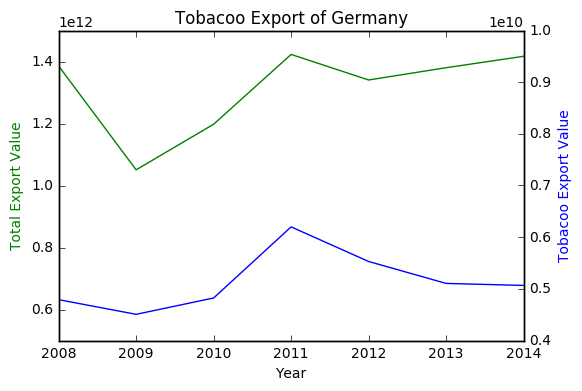

In [221]:
years = ['2008','2009','2010','2011','2012','2013','2014']
#years = [2008,2009,2010,2011,2012,2013,2014]
#x = np.array([0,1,2,3,4,5,6])
tobacoo = [deu_toba_export_2008,deu_toba_export_2009,deu_toba_export_2010,deu_toba_export_2011,deu_toba_export_2012,deu_toba_export_2013,deu_toba_export_2014]
export = [deu_export2008,deu_export2009,deu_export2010,deu_export2011,deu_export2012,deu_export2013,deu_export2014]
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(years, export, 'g-')
ax2.plot(years, tobacoo, 'b-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Export Value', color='g')
ax2.set_ylabel('Tobacoo Export Value', color='b')
ax1.set_ylim([5e11,1.5e12])
ax2.set_ylim([4e9,10e9])
ax1.set_xticklabels(years)
plt.title('Tobacoo Export of Germany')
#plt.show()
#plt.plot(x,export,marker='o',color = 'green',linestyle = 'solid')
#plt.plot(x,tobacoo,marker='o',color = 'blue',linestyle = 'solid')
#plt.title('Total export trend vs tobacoo export trend of Germany')
#plt.show()
plt.savefig('germany.png')

In [57]:
type(ax1)

matplotlib.axes._subplots.AxesSubplot

In [104]:
plt.savefig("tobacoo.png",)

In [105]:
tobacoo1_20081 = WTN[(WTN['hs07'] == 2401) & (WTN['export_val']>0) & (WTN['year'] == 2008) ]
tobacoo2_20081 = WTN[(WTN['hs07'] == 2402) & (WTN['export_val']>0) & (WTN['year'] == 2008) ]
tobacoo3_20081 = WTN[(WTN['hs07'] == 2403) & (WTN['export_val']>0) & (WTN['year'] == 2008) ]

In [110]:
tobacoo2008_temp1 = [tobacoo1_20081, tobacoo2_20081, tobacoo3_20081]
tobacoo20081 = pd.concat(tobacoo2008_temp1)

In [112]:
deu_export20081 = tobacoo20081.groupby(by=['origin'])['export_val'].sum()

In [113]:
deu_export20081.nlargest(10)

origin
deu    4.790216e+09
nld    4.615456e+09
bra    2.783606e+09
usa    2.032347e+09
blx    1.125692e+09
pol    1.064356e+09
che    9.030804e+08
fra    8.250308e+08
chn    8.096802e+08
tur    7.699054e+08
Name: export_val, dtype: float64

In [132]:
pol2008 = WTN[(WTN['origin'] == "che") & (WTN['export_val']>0) & (WTN['year'] == 2008)]

In [133]:
pol_export2008 = pol2008.groupby(by=['origin'])['export_val'].sum()

In [134]:
pol_export2008

origin
che    2.137887e+11
Name: export_val, dtype: float64

In [125]:
export

[origin
 deu    1.385614e+12
 Name: export_val, dtype: float64, origin
 deu    1.050629e+12
 Name: export_val, dtype: float64, origin
 deu    1.197598e+12
 Name: export_val, dtype: float64, origin
 deu    1.422815e+12
 Name: export_val, dtype: float64, origin
 deu    1.340391e+12
 Name: export_val, dtype: float64, origin
 deu    1.379983e+12
 Name: export_val, dtype: float64, origin
 deu    1.416808e+12
 Name: export_val, dtype: float64]

Cork

In [88]:
cork1_2008 = WTN[(WTN['hs07'] == 4501) & (WTN['export_val']>0) & (WTN['year'] == 2008)& (WTN['origin'] == 'prt')]
cork2_2008 = WTN[(WTN['hs07'] == 4502) & (WTN['export_val']>0) & (WTN['year'] == 2008)& (WTN['origin'] == 'prt')]
cork3_2008 = WTN[(WTN['hs07'] == 4503) & (WTN['export_val']>0) & (WTN['year'] == 2008) & (WTN['origin'] == 'prt')]
cork1_2009 = WTN[(WTN['hs07'] == 4501) & (WTN['export_val']>0) & (WTN['year'] == 2009) & (WTN['origin'] == 'prt')]
cork2_2009 = WTN[(WTN['hs07'] == 4502) & (WTN['export_val']>0) & (WTN['year'] == 2009) & (WTN['origin'] == 'prt')]
cork3_2009 = WTN[(WTN['hs07'] == 4503) & (WTN['export_val']>0) & (WTN['year'] == 2009) & (WTN['origin'] == 'prt')] 
cork1_2010 = WTN[(WTN['hs07'] == 4501) & (WTN['export_val']>0) & (WTN['year'] == 2010)& (WTN['origin'] == 'prt')]
cork2_2010 = WTN[(WTN['hs07'] == 4502) & (WTN['export_val']>0) & (WTN['year'] == 2010)& (WTN['origin'] == 'prt')]
cork3_2010 = WTN[(WTN['hs07'] == 4503) & (WTN['export_val']>0) & (WTN['year'] == 2010) & (WTN['origin'] == 'prt')]
cork1_2011 = WTN[(WTN['hs07'] == 4501) & (WTN['export_val']>0) & (WTN['year'] == 2011)& (WTN['origin'] == 'prt')]
cork2_2011 = WTN[(WTN['hs07'] == 4502) & (WTN['export_val']>0) & (WTN['year'] == 2011) & (WTN['origin'] == 'prt')]
cork3_2011 = WTN[(WTN['hs07'] == 4503) & (WTN['export_val']>0) & (WTN['year'] == 2011)& (WTN['origin'] == 'prt')]
cork1_2012 = WTN[(WTN['hs07'] == 4501) & (WTN['export_val']>0) & (WTN['year'] == 2012)& (WTN['origin'] == 'prt')]
cork2_2012 = WTN[(WTN['hs07'] == 4502) & (WTN['export_val']>0) & (WTN['year'] == 2012) & (WTN['origin'] == 'prt')]
cork3_2012 = WTN[(WTN['hs07'] == 4503) & (WTN['export_val']>0) & (WTN['year'] == 2012) & (WTN['origin'] == 'prt')]
cork1_2013 = WTN[(WTN['hs07'] == 4501) & (WTN['export_val']>0) & (WTN['year'] == 2013) & (WTN['origin'] == 'prt')]
cork2_2013 = WTN[(WTN['hs07'] == 4502) & (WTN['export_val']>0) & (WTN['year'] == 2013) & (WTN['origin'] == 'prt')]
cork3_2013 = WTN[(WTN['hs07'] == 4503) & (WTN['export_val']>0) & (WTN['year'] == 2013) & (WTN['origin'] == 'prt')]
cork1_2014 = WTN[(WTN['hs07'] == 4501) & (WTN['export_val']>0) & (WTN['year'] == 2014) & (WTN['origin'] == 'prt')]
cork2_2014 = WTN[(WTN['hs07'] == 4502) & (WTN['export_val']>0) & (WTN['year'] == 2014) & (WTN['origin'] == 'prt')]
cork3_2014 = WTN[(WTN['hs07'] == 4503) & (WTN['export_val']>0) & (WTN['year'] == 2014) & (WTN['origin'] == 'prt')]



In [89]:
cork2008_temp = [cork1_2008, cork2_2008, cork3_2008]
cork2008 = pd.concat(cork2008_temp)
cork2009_temp = [cork1_2009, cork2_2009, cork3_2009]
cork2009 = pd.concat(cork2009_temp)
cork2010_temp = [cork1_2010, cork2_2010, cork3_2010]
cork2010 = pd.concat(cork2010_temp)
cork2011_temp = [cork1_2011, cork2_2011, cork3_2011]
cork2011 = pd.concat(cork2011_temp)
cork2012_temp = [cork1_2012, cork2_2012, cork3_2012]
cork2012 = pd.concat(cork2012_temp)
cork2013_temp = [cork1_2013, cork2_2013, cork3_2013]
cork2013 = pd.concat(cork2013_temp)
cork2014_temp = [cork1_2014, cork2_2014, cork3_2014]
cork2014 = pd.concat(cork2014_temp)

In [90]:
cork_export_2008=cork2008.groupby(by=['origin'])['export_val'].sum()
cork_export_2009=cork2009.groupby(by=['origin'])['export_val'].sum()
cork_export_2010=cork2010.groupby(by=['origin'])['export_val'].sum()
cork_export_2011=cork2011.groupby(by=['origin'])['export_val'].sum()
cork_export_2012=cork2012.groupby(by=['origin'])['export_val'].sum()
cork_export_2013=cork2013.groupby(by=['origin'])['export_val'].sum()
cork_export_2014=cork2014.groupby(by=['origin'])['export_val'].sum()

In [91]:
cork_export_2008


origin
prt    709355977.0
Name: export_val, dtype: float64

In [92]:
cork = [cork_export_2008,cork_export_2009,cork_export_2010,cork_export_2011,cork_export_2012,cork_export_2013,cork_export_2014]

In [93]:
cork


[origin
 prt    709355977.0
 Name: export_val, dtype: float64, origin
 prt    5.250234e+08
 Name: export_val, dtype: float64, origin
 prt    5.525733e+08
 Name: export_val, dtype: float64, origin
 prt    602236699.3
 Name: export_val, dtype: float64, origin
 prt    585217051.2
 Name: export_val, dtype: float64, origin
 prt    5.756333e+08
 Name: export_val, dtype: float64, origin
 prt    6.148809e+08
 Name: export_val, dtype: float64]

In [94]:
prt2008 = WTN[(WTN['origin'] == "prt") & (WTN['export_val']>0) & (WTN['year'] == 2008)]
prt2009 = WTN[(WTN['origin'] == "prt") & (WTN['export_val']>0) & (WTN['year'] == 2009)]
prt2010 = WTN[(WTN['origin'] == "prt") & (WTN['export_val']>0) & (WTN['year'] == 2010)]
prt2011 = WTN[(WTN['origin'] == "prt") & (WTN['export_val']>0) & (WTN['year'] == 2011)]
prt2012 = WTN[(WTN['origin'] == "prt") & (WTN['export_val']>0) & (WTN['year'] == 2012)]
prt2013 = WTN[(WTN['origin'] == "prt") & (WTN['export_val']>0) & (WTN['year'] == 2013)]
prt2014 = WTN[(WTN['origin'] == "prt") & (WTN['export_val']>0) & (WTN['year'] == 2014)]

In [95]:
prt_export2008 = prt2008.groupby(by=['origin'])['export_val'].sum()
prt_export2009 = prt2009.groupby(by=['origin'])['export_val'].sum()
prt_export2010 = prt2010.groupby(by=['origin'])['export_val'].sum()
prt_export2011 = prt2011.groupby(by=['origin'])['export_val'].sum()
prt_export2012 = prt2012.groupby(by=['origin'])['export_val'].sum()
prt_export2013 = prt2013.groupby(by=['origin'])['export_val'].sum()
prt_export2014 = prt2014.groupby(by=['origin'])['export_val'].sum()

In [96]:
prt_export = [prt_export2008,prt_export2009,prt_export2010,prt_export2011,prt_export2012,prt_export2013,prt_export2014]

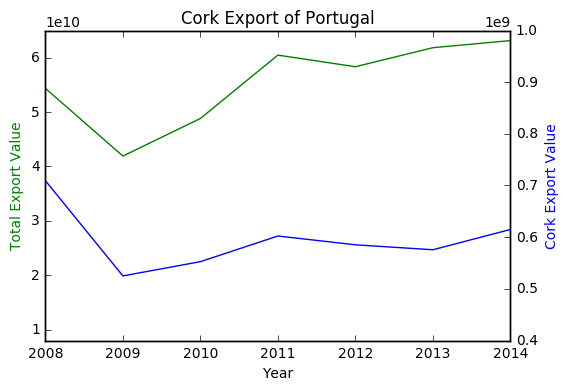

In [220]:
years = ['2008','2009','2010','2011','2012','2013','2014']
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(years, prt_export, 'g-')
ax2.plot(years, cork, 'b-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Export Value', color='g')
ax2.set_ylabel('Cork Export Value', color='b')
ax1.set_ylim([8e9,6.5e10])
ax2.set_ylim([4e8,1e9])
ax1.set_xticklabels(years)
plt.title('Cork Export of Portugal')
#plt.show()
plt.savefig('portugal.png')

In [111]:
sum(WTN['hs07'][:1000].astype(str).str[:2]=='50')

4

In [114]:
WTN['hs07'] = WTN['hs07'].astype(str)

In [113]:
WTN.dtypes

year            int64
origin         object
dest           object
hs07            int64
export_val    float64
import_val    float64
dtype: object

Silk

In [121]:
c1 = ( (WTN.hs07.str[:3] == '500') &
      (WTN.export_val>0) &
      (WTN.year == 2008) &
      (WTN.origin == 'chn'))
silk_2008 = WTN[c1]

In [123]:
c2 = ((WTN.hs07.str[:3] == '500') & (WTN.export_val>0) & (WTN.year == 2009) & (WTN.origin == 'chn'))
c3 = ((WTN.hs07.str[:3] == '500') & (WTN.export_val>0) & (WTN.year == 2010) & (WTN.origin == 'chn'))
c4 = ((WTN.hs07.str[:3] == '500') & (WTN.export_val>0) & (WTN.year == 2011) & (WTN.origin == 'chn'))
c5 = ((WTN.hs07.str[:3] == '500') & (WTN.export_val>0) & (WTN.year == 2012) & (WTN.origin == 'chn'))
c6 = ((WTN.hs07.str[:3] == '500') & (WTN.export_val>0) & (WTN.year == 2013) & (WTN.origin == 'chn'))
c7 = ((WTN.hs07.str[:3] == '500') & (WTN.export_val>0) & (WTN.year == 2014) & (WTN.origin == 'chn'))
silk_2009 = WTN[c2]
silk_2010 = WTN[c3]
silk_2011 = WTN[c4]
silk_2012 = WTN[c5]
silk_2013 = WTN[c6]
silk_2014 = WTN[c7]


In [124]:
silk_2008 = silk_2008.groupby(by=['origin'])['export_val'].sum()
silk_2009 = silk_2009.groupby(by=['origin'])['export_val'].sum()
silk_2010 = silk_2010.groupby(by=['origin'])['export_val'].sum()
silk_2011 = silk_2011.groupby(by=['origin'])['export_val'].sum()
silk_2012 = silk_2012.groupby(by=['origin'])['export_val'].sum()
silk_2013 = silk_2013.groupby(by=['origin'])['export_val'].sum()
silk_2014 = silk_2014.groupby(by=['origin'])['export_val'].sum()

In [125]:
silk_chn = [silk_2008, silk_2009, silk_2010, silk_2011, silk_2012, silk_2013, silk_2014]

In [126]:
silk_chn

[origin
 chn    1.461219e+09
 Name: export_val, dtype: float64, origin
 chn    1.196033e+09
 Name: export_val, dtype: float64, origin
 chn    1.415304e+09
 Name: export_val, dtype: float64, origin
 chn    1.563550e+09
 Name: export_val, dtype: float64, origin
 chn    1.456975e+09
 Name: export_val, dtype: float64, origin
 chn    1.423813e+09
 Name: export_val, dtype: float64, origin
 chn    1.322609e+09
 Name: export_val, dtype: float64]

In [127]:
chn2008 = WTN[(WTN['origin'] == "chn") & (WTN['export_val']>0) & (WTN['year'] == 2008)]
chn2009 = WTN[(WTN['origin'] == "chn") & (WTN['export_val']>0) & (WTN['year'] == 2009)]
chn2010 = WTN[(WTN['origin'] == "chn") & (WTN['export_val']>0) & (WTN['year'] == 2010)]
chn2011 = WTN[(WTN['origin'] == "chn") & (WTN['export_val']>0) & (WTN['year'] == 2011)]
chn2012 = WTN[(WTN['origin'] == "chn") & (WTN['export_val']>0) & (WTN['year'] == 2012)]
chn2013 = WTN[(WTN['origin'] == "chn") & (WTN['export_val']>0) & (WTN['year'] == 2013)]
chn2014 = WTN[(WTN['origin'] == "chn") & (WTN['export_val']>0) & (WTN['year'] == 2014)]

In [128]:
chn_export2008 = chn2008.groupby(by=['origin'])['export_val'].sum()
chn_export2009 = chn2009.groupby(by=['origin'])['export_val'].sum()
chn_export2010 = chn2010.groupby(by=['origin'])['export_val'].sum()
chn_export2011 = chn2011.groupby(by=['origin'])['export_val'].sum()
chn_export2012 = chn2012.groupby(by=['origin'])['export_val'].sum()
chn_export2013 = chn2013.groupby(by=['origin'])['export_val'].sum()
chn_export2014 = chn2014.groupby(by=['origin'])['export_val'].sum()


In [129]:
chn_export = [chn_export2008, chn_export2009, chn_export2010, chn_export2011, chn_export2012,chn_export2013,chn_export2014]

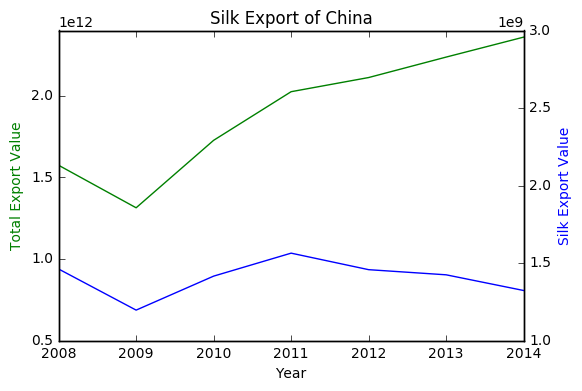

In [219]:
years = ['2008','2009','2010','2011','2012','2013','2014']
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(years, chn_export, 'g-')
ax2.plot(years, silk_chn, 'b-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Export Value', color='g')
ax2.set_ylabel('Silk Export Value', color='b')
ax1.set_ylim([5e11,2.4e12])
ax2.set_ylim([1e9,3e9])
ax1.set_xticklabels(years)
plt.title('Silk Export of China')
#plt.show()
plt.savefig('China.png')

Mineral Products

In [159]:
d1 = ((WTN.hs07.str[:3] == '270') & (WTN.export_val>0) & (WTN.year == 2008) & (WTN.origin == 'sau'))
d2 = ((WTN.hs07.str[:3] == '270') & (WTN.export_val>0) & (WTN.year == 2009) & (WTN.origin == 'sau'))
d3 = ((WTN.hs07.str[:3] == '270') & (WTN.export_val>0) & (WTN.year == 2010) & (WTN.origin == 'sau'))
d4 = ((WTN.hs07.str[:3] == '270') & (WTN.export_val>0) & (WTN.year == 2011) & (WTN.origin == 'sau'))
d5 = ((WTN.hs07.str[:3] == '270') & (WTN.export_val>0) & (WTN.year == 2012) & (WTN.origin == 'sau'))
d6 = ((WTN.hs07.str[:3] == '270') & (WTN.export_val>0) & (WTN.year == 2013) & (WTN.origin == 'sau'))
d7 = ((WTN.hs07.str[:3] == '270') & (WTN.export_val>0) & (WTN.year == 2014) & (WTN.origin == 'sau'))
mineral2008 = WTN[d1]
mineral2009 = WTN[d2]
mineral2010 = WTN[d3]
mineral2011 = WTN[d4]
mineral2012 = WTN[d5]
mineral2013 = WTN[d6]
mineral2014 = WTN[d7]


In [160]:
mineral2008 = mineral2008.groupby(by=['origin'])['export_val'].sum()
mineral2009 = mineral2009.groupby(by=['origin'])['export_val'].sum()
mineral2010 = mineral2010.groupby(by=['origin'])['export_val'].sum()
mineral2011 = mineral2011.groupby(by=['origin'])['export_val'].sum()
mineral2012 = mineral2012.groupby(by=['origin'])['export_val'].sum()
mineral2013 = mineral2013.groupby(by=['origin'])['export_val'].sum()
mineral2014 = mineral2014.groupby(by=['origin'])['export_val'].sum()



In [161]:
mineral = [mineral2008,mineral2009,mineral2010,mineral2011,mineral2012,mineral2013,mineral2014]

In [162]:
mineral

[origin
 sau    4.229333e+11
 Name: export_val, dtype: float64, origin
 sau    2.495934e+11
 Name: export_val, dtype: float64, origin
 sau    3.366420e+11
 Name: export_val, dtype: float64, origin
 sau    5.034054e+11
 Name: export_val, dtype: float64, origin
 sau    5.494572e+11
 Name: export_val, dtype: float64, origin
 sau    4.405368e+11
 Name: export_val, dtype: float64, origin
 sau    2.360691e+11
 Name: export_val, dtype: float64]

In [163]:
sau2008 = WTN[(WTN['origin'] == "sau") & (WTN['export_val']>0) & (WTN['year'] == 2008)]
sau2009 = WTN[(WTN['origin'] == "sau") & (WTN['export_val']>0) & (WTN['year'] == 2009)]
sau2010 = WTN[(WTN['origin'] == "sau") & (WTN['export_val']>0) & (WTN['year'] == 2010)]
sau2011 = WTN[(WTN['origin'] == "sau") & (WTN['export_val']>0) & (WTN['year'] == 2011)]
sau2012 = WTN[(WTN['origin'] == "sau") & (WTN['export_val']>0) & (WTN['year'] == 2012)]
sau2013 = WTN[(WTN['origin'] == "sau") & (WTN['export_val']>0) & (WTN['year'] == 2013)]
sau2014 = WTN[(WTN['origin'] == "sau") & (WTN['export_val']>0) & (WTN['year'] == 2014)]


In [165]:
sau_export2008 = sau2008.groupby(by=['origin'])['export_val'].sum()
sau_export2009 = sau2009.groupby(by=['origin'])['export_val'].sum()
sau_export2010 = sau2010.groupby(by=['origin'])['export_val'].sum()
sau_export2011 = sau2011.groupby(by=['origin'])['export_val'].sum()
sau_export2012 = sau2012.groupby(by=['origin'])['export_val'].sum()
sau_export2013 = sau2013.groupby(by=['origin'])['export_val'].sum()
sau_export2014 = sau2014.groupby(by=['origin'])['export_val'].sum()


In [166]:
sau_export = [sau_export2008, sau_export2009, sau_export2010, sau_export2011, sau_export2012, sau_export2013, sau_export2014]

In [167]:
sau_export

[origin
 sau    5.143443e+11
 Name: export_val, dtype: float64, origin
 sau    3.178337e+11
 Name: export_val, dtype: float64, origin
 sau    4.348816e+11
 Name: export_val, dtype: float64, origin
 sau    6.219353e+11
 Name: export_val, dtype: float64, origin
 sau    6.793271e+11
 Name: export_val, dtype: float64, origin
 sau    5.555730e+11
 Name: export_val, dtype: float64, origin
 sau    3.094016e+11
 Name: export_val, dtype: float64]

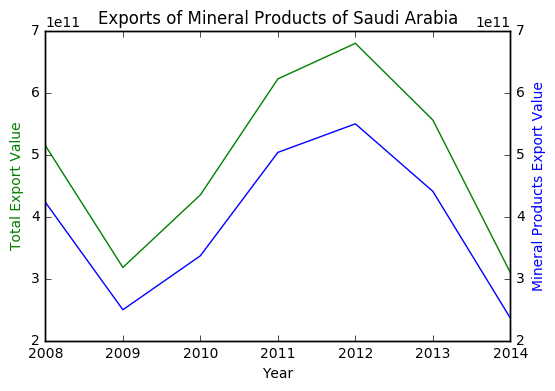

In [218]:
years = ['2008','2009','2010','2011','2012','2013','2014']
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(years, sau_export, 'g-')
ax2.plot(years, mineral, 'b-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Export Value', color='g')
ax2.set_ylabel('Mineral Products Export Value', color='b')
ax1.set_ylim([2e11,7e11])
ax2.set_ylim([2e11,7e11])
ax1.set_xticklabels(years)
plt.title('Exports of Mineral Products of Saudi Arabia')
#plt.show()
plt.savefig('saudi arabia.png')

In [1]:
Clocks and watches

NameError: name 'Clocks' is not defined

In [175]:
e1 = ((WTN.hs07.str[:3] == '910') & (WTN.export_val>0) & (WTN.year == 2008) & (WTN.origin == 'che'))
e2 = ((WTN.hs07.str[:3] == '910') & (WTN.export_val>0) & (WTN.year == 2009) & (WTN.origin == 'che'))
e3 = ((WTN.hs07.str[:3] == '910') & (WTN.export_val>0) & (WTN.year == 2010) & (WTN.origin == 'che'))
e4 = ((WTN.hs07.str[:3] == '910') & (WTN.export_val>0) & (WTN.year == 2011) & (WTN.origin == 'che'))
e5 = ((WTN.hs07.str[:3] == '910') & (WTN.export_val>0) & (WTN.year == 2012) & (WTN.origin == 'che'))
e6 = ((WTN.hs07.str[:3] == '910') & (WTN.export_val>0) & (WTN.year == 2013) & (WTN.origin == 'che'))
e7 = ((WTN.hs07.str[:3] == '910') & (WTN.export_val>0) & (WTN.year == 2014) & (WTN.origin == 'che'))
clock08 = WTN[e1]
clock09 = WTN[e2]
clock10 = WTN[e3]
clock11 = WTN[e4]
clock12 = WTN[e5]
clock13 = WTN[e6]
clock14 = WTN[e7]

In [180]:
#clock08 = clock08.groupby(by=['origin'])['export_val'].sum()
clock09 = clock09.groupby(by=['origin'])['export_val'].sum()
clock10 = clock10.groupby(by=['origin'])['export_val'].sum()
clock11 = clock11.groupby(by=['origin'])['export_val'].sum()
clock12 = clock12.groupby(by=['origin'])['export_val'].sum()
clock13 = clock13.groupby(by=['origin'])['export_val'].sum()
clock14 = clock14.groupby(by=['origin'])['export_val'].sum()

In [181]:
clock = [clock08, clock09, clock10, clock11, clock12, clock13, clock14]

In [182]:
che2008 = WTN[(WTN['origin'] == "che") & (WTN['export_val']>0) & (WTN['year'] == 2008)]
che2009 = WTN[(WTN['origin'] == "che") & (WTN['export_val']>0) & (WTN['year'] == 2009)]
che2010 = WTN[(WTN['origin'] == "che") & (WTN['export_val']>0) & (WTN['year'] == 2010)]
che2011 = WTN[(WTN['origin'] == "che") & (WTN['export_val']>0) & (WTN['year'] == 2011)]
che2012 = WTN[(WTN['origin'] == "che") & (WTN['export_val']>0) & (WTN['year'] == 2012)]
che2013 = WTN[(WTN['origin'] == "che") & (WTN['export_val']>0) & (WTN['year'] == 2013)]
che2014 = WTN[(WTN['origin'] == "che") & (WTN['export_val']>0) & (WTN['year'] == 2014)]


In [183]:
che_export2008 = che2008.groupby(by=['origin'])['export_val'].sum()
che_export2009 = che2009.groupby(by=['origin'])['export_val'].sum()
che_export2010 = che2010.groupby(by=['origin'])['export_val'].sum()
che_export2011 = che2011.groupby(by=['origin'])['export_val'].sum()
che_export2012 = che2012.groupby(by=['origin'])['export_val'].sum()
che_export2013 = che2013.groupby(by=['origin'])['export_val'].sum()
che_export2014 = che2014.groupby(by=['origin'])['export_val'].sum()


In [184]:
che_export = [che_export2008,che_export2009,che_export2010,che_export2011,che_export2012,che_export2013,che_export2014]

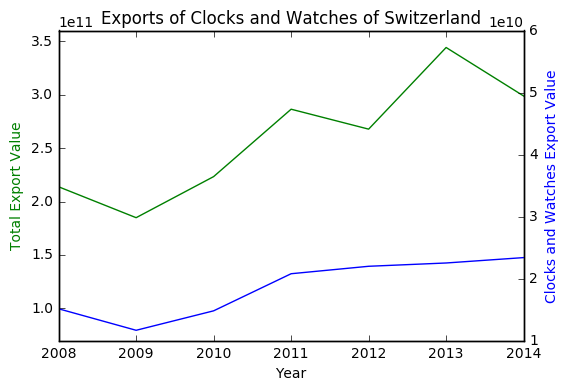

In [217]:
years = ['2008','2009','2010','2011','2012','2013','2014']
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(years, che_export, 'g-')
ax2.plot(years, clock, 'b-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Export Value', color='g')
ax2.set_ylabel('Clocks and Watches Export Value', color='b')
ax1.set_ylim([7e10,3.6e11])
ax2.set_ylim([1e10,6e10])
ax1.set_xticklabels(years)
plt.title('Exports of Clocks and Watches of Switzerland')
#plt.show()
plt.savefig('switzerland.png')

Iron and steel

In [198]:
f1 = ((WTN.hs07.str[:3] == '720') & (WTN.export_val>0) & (WTN.year == 2008) & (WTN.origin == 'rus'))
f2 = ((WTN.hs07.str[:3] == '720') & (WTN.export_val>0) & (WTN.year == 2009) & (WTN.origin == 'rus'))
f3 = ((WTN.hs07.str[:3] == '720') & (WTN.export_val>0) & (WTN.year == 2010) & (WTN.origin == 'rus'))
f4 = ((WTN.hs07.str[:3] == '720') & (WTN.export_val>0) & (WTN.year == 2011) & (WTN.origin == 'rus'))
f5 = ((WTN.hs07.str[:3] == '720') & (WTN.export_val>0) & (WTN.year == 2012) & (WTN.origin == 'rus'))
f6 = ((WTN.hs07.str[:3] == '720') & (WTN.export_val>0) & (WTN.year == 2013) & (WTN.origin == 'rus'))
f7 = ((WTN.hs07.str[:3] == '720') & (WTN.export_val>0) & (WTN.year == 2014) & (WTN.origin == 'rus'))
metal08 = WTN[f1]
metal09 = WTN[f2]
metal10 = WTN[f3]
metal11 = WTN[f4]
metal12 = WTN[f5]
metal13 = WTN[f6]
metal14 = WTN[f7]

In [199]:
metal08 = metal08.groupby(by=['origin'])['export_val'].sum()
metal09 = metal09.groupby(by=['origin'])['export_val'].sum()
metal10 = metal10.groupby(by=['origin'])['export_val'].sum()
metal11 = metal11.groupby(by=['origin'])['export_val'].sum()
metal12 = metal12.groupby(by=['origin'])['export_val'].sum()
metal13 = metal13.groupby(by=['origin'])['export_val'].sum()
metal14 = metal14.groupby(by=['origin'])['export_val'].sum()

In [200]:
metal = [metal08, metal09, metal10, metal11, metal12, metal13, metal14]

In [201]:
rus2008 = WTN[(WTN['origin'] == "rus") & (WTN['export_val']>0) & (WTN['year'] == 2008)]
rus2009 = WTN[(WTN['origin'] == "rus") & (WTN['export_val']>0) & (WTN['year'] == 2009)]
rus2010 = WTN[(WTN['origin'] == "rus") & (WTN['export_val']>0) & (WTN['year'] == 2010)]
rus2011 = WTN[(WTN['origin'] == "rus") & (WTN['export_val']>0) & (WTN['year'] == 2011)]
rus2012 = WTN[(WTN['origin'] == "rus") & (WTN['export_val']>0) & (WTN['year'] == 2012)]
rus2013 = WTN[(WTN['origin'] == "rus") & (WTN['export_val']>0) & (WTN['year'] == 2013)]
rus2014 = WTN[(WTN['origin'] == "rus") & (WTN['export_val']>0) & (WTN['year'] == 2014)]


In [202]:
rus_export2008 = rus2008.groupby(by=['origin'])['export_val'].sum()
rus_export2009 = rus2009.groupby(by=['origin'])['export_val'].sum()
rus_export2010 = rus2010.groupby(by=['origin'])['export_val'].sum()
rus_export2011 = rus2011.groupby(by=['origin'])['export_val'].sum()
rus_export2012 = rus2012.groupby(by=['origin'])['export_val'].sum()
rus_export2013 = rus2013.groupby(by=['origin'])['export_val'].sum()
rus_export2014 = rus2014.groupby(by=['origin'])['export_val'].sum()

In [203]:
rus_export = [rus_export2008,rus_export2009,rus_export2010,rus_export2011,rus_export2012,rus_export2013,rus_export2014]

In [205]:
rus_export

[origin
 rus    4.617402e+11
 Name: export_val, dtype: float64, origin
 rus    2.904478e+11
 Name: export_val, dtype: float64, origin
 rus    3.841642e+11
 Name: export_val, dtype: float64, origin
 rus    5.049366e+11
 Name: export_val, dtype: float64, origin
 rus    4.751640e+11
 Name: export_val, dtype: float64, origin
 rus    4.802043e+11
 Name: export_val, dtype: float64, origin
 rus    4.487912e+11
 Name: export_val, dtype: float64]

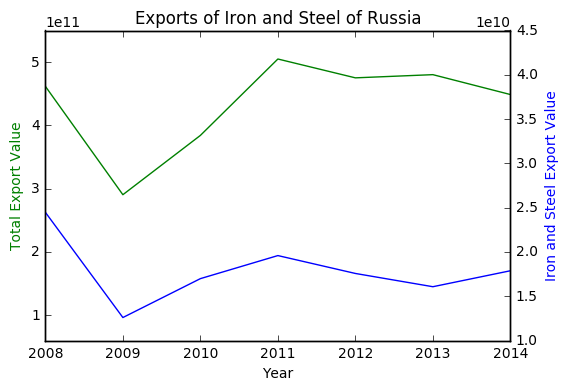

In [216]:
years = ['2008','2009','2010','2011','2012','2013','2014']
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(years, rus_export, 'g-')
ax2.plot(years, metal, 'b-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Export Value', color='g')
ax2.set_ylabel('Iron and Steel Export Value', color='b')
ax1.set_ylim([6e10,5.5e11])
ax2.set_ylim([1e10,4.5e10])
ax1.set_xticklabels(years)
plt.title('Exports of Iron and Steel of Russia')
#plt.show()
plt.savefig('russia.png')